# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

In [1]:
import pandas as pd

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [2]:
import os

folder_path = "./datasets"
df_dict = {}

for filename in os.listdir(folder_path):
    filepath = os.path.join(folder_path, filename)
    if os.path.isfile(filepath):
        df_dict[filename.replace('.csv', '')] = pd.read_csv(filepath)

In [3]:
for name, df in df_dict.items():
    print(name)
    display(df.head(3))
    print(f'Размер: {df.shape}\n')

df_result


,Unnamed: 0,AGREEMENT_RK,TARGET,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,...,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,FAMILY_INCOME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,0,59910150,0,49,1,Среднее специальное,Состою в браке,2,1,1,...,Оренбургская область,0,0,от 10000 до 20000 руб.,5000.0,8000.0,6,8650.0,1,1
1,1,59910230,0,32,1,Среднее,Состою в браке,3,3,1,...,Кабардино-Балкария,0,0,от 10000 до 20000 руб.,12000.0,21650.0,6,4000.0,1,1
2,2,59910525,0,52,1,Неполное среднее,Состою в браке,4,0,1,...,Иркутская область,0,0,от 10000 до 20000 руб.,9000.0,33126.0,12,4000.0,2,1


Размер: (15223, 23)

D_clients


,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1


Размер: (16000, 14)

D_close_loan


,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1


Размер: (21126, 2)

D_job


,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372


Размер: (15223, 5)

D_last_credit


,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
0,8000.0,6,8650.0,106804370
1,21650.0,6,4000.0,106804371
2,33126.0,12,4000.0,106804372


Размер: (15223, 4)

D_loan


,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372


Размер: (21126, 2)

D_pens


,ID,FLAG,COMMENT
0,1,0,пенсионер
1,2,1,не пенсионер


Размер: (2, 3)

D_salary


,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521


Размер: (15523, 3)

D_target


,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0


Размер: (15223, 3)

D_work


,ID,FLAG,COMMENT
0,1,0,работает
1,2,1,не работает
2,3,2,не известно


Размер: (3, 3)



Соединим данные таблиц кредитов

In [4]:
df_loan = pd.merge(df_dict['D_loan'], df_dict['D_close_loan'], on='ID_LOAN', how='left')
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21126 entries, 0 to 21125
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID_LOAN    21126 non-null  int64
 1   ID_CLIENT  21126 non-null  int64
 2   CLOSED_FL  21126 non-null  int64
dtypes: int64(3)
memory usage: 660.2 KB


Строки не задублировались, для каждого кредита нашелся статус.

Проверим, что нет дублирующихся строк

In [5]:
df_loan.duplicated(subset=['ID_LOAN', 'ID_CLIENT']).sum()

0

Получим нужные поля:
- LOAN_NUM_TOTAL — количество ссуд клиента;
- LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

In [6]:
df_loan = df_loan.groupby('ID_CLIENT', as_index=False).agg(
    LOAN_NUM_TOTAL=('ID_LOAN', 'nunique'),
    LOAN_NUM_CLOSED=('CLOSED_FL', 'sum')
)
df_loan.head(3)

,ID_CLIENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106804370,1,1
1,106804371,1,1
2,106804372,2,1


В таблице зарплат есть дубли

In [7]:
df_dict['D_salary'].duplicated(subset=['ID_CLIENT']).sum()

300

Оставим последнюю строку, предполагая, что это самое актуальное значение

In [8]:
df_salary = df_dict['D_salary'][~df_dict['D_salary'].duplicated(subset=['ID_CLIENT'], keep='last')]
df_salary.shape

(15223, 3)

Проверим данные о работе на наличие пропущенных значений

In [9]:
na_counts = df_dict['D_job'].isnull().sum()
na_counts[na_counts>0]

GEN_INDUSTRY    1367
GEN_TITLE       1367
JOB_DIR         1367
WORK_TIME       1368
dtype: int64

Слишком много пропущенных значений, в рамках этой задачи не будем использовать

Объединим данные в один датафрейм

In [10]:
df = pd.merge(df_dict['D_target'], df_dict['D_clients'], left_on='ID_CLIENT', right_on='ID', how='left')
df = pd.merge(df, df_salary, on='ID_CLIENT', how='left')
df = pd.merge(df, df_dict['D_last_credit'], on='ID_CLIENT', how='left')
df = pd.merge(df, df_loan, on='ID_CLIENT', how='left')

In [11]:
df.shape

(15223, 24)

Проверим, есть ли пропущенные значения

In [12]:
na_counts = df.isnull().sum()
na_counts[na_counts>0]

Series([], dtype: int64)

Пропущенных значений нет

Сохраним результат в файл

In [13]:
df.drop(['ID', 'ID_CLIENT'], axis=1, inplace=True)
df.to_csv('.\datasets\df_result.csv')

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

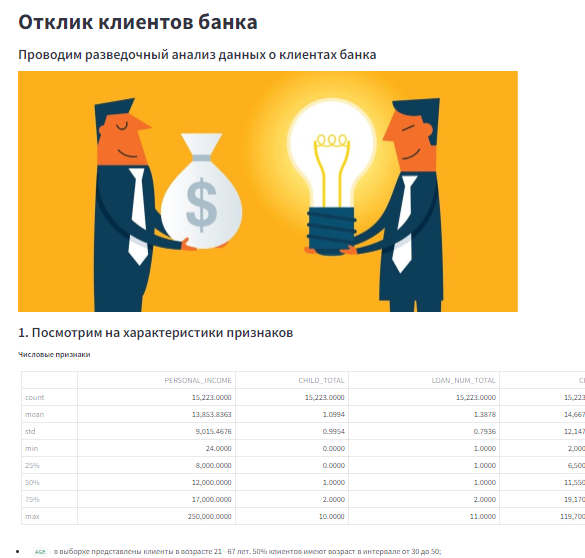

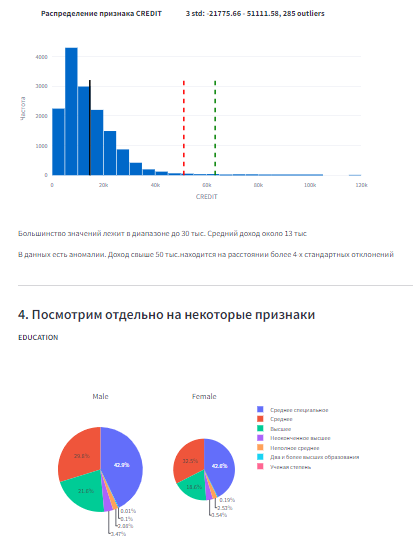

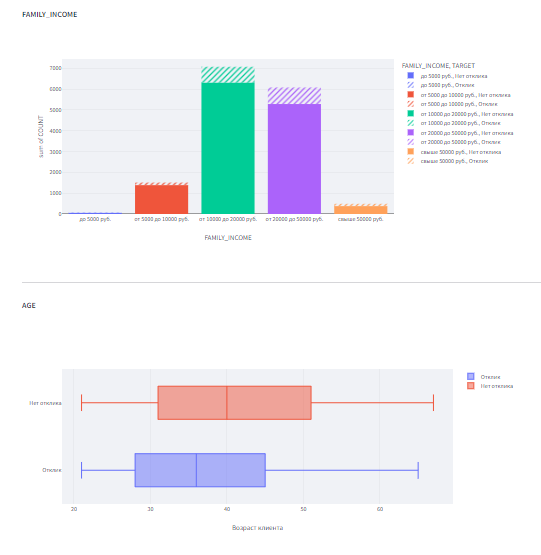

Проведен разведывательный анализ данных. Целью было поработать со streamlit и проверить, как отображаются различные виды графиков, а не глубина анализа.

[Код приложение Streamlit](streamlit_page.py)